In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


Valores totais: 


3    1696
1    1657
2    1647
Name: Class, dtype: int64

<Axes: >

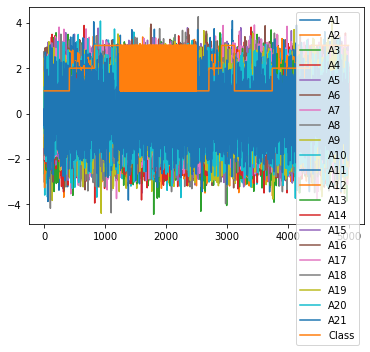

In [2]:
#DF
df = pd.read_csv('WDVG.csv')
#display(df)
print('Valores totais: ')
display((df.iloc[:, -1]).value_counts())

df.plot()


In [3]:
# CLASSIFICADORES


acuracia_melhor_knn=[]
acuracia_melhor_arvore = []
acuracia_melhor_svm = []
acuracia_melhor_mlp = []
acuracia_naive_bayes = []

proba_knn = []
proba_arvore = [] 
proba_svm = []
proba_mlp = []
proba_nb = []

accSomaVetor = []
accVotoVetor = []
accBordaVetor = []

def calculate_rank(lst):
    ranked_dict = {val: i+1 for i, val in enumerate(sorted(set(lst)))}
    return [ranked_dict[val] for val in lst]


loop = 20

for i in range(loop):

    print("\n\nExecução: ", i+1)
    
    #CALIBRAGEM
    print("\nCalibragem-", i+1)
    
    x = df.iloc[:, :-1]  # Todos exceto a última coluna
    y = df.iloc[:, -1]   # última coluna

    # 70% para treinamento - 15% para validação - 15% para teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, shuffle = True)
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)


    #KNN

    print("KNN")
    # Defina os hiperparâmetros que deseja otimizar
    param_grid = {
        'n_neighbors': list(range(1, 50)),  # Valores de k
        'weights': ['uniform', 'distance'],  # Tipo de ponderação
        'metric': ["euclidean", "manhattan"]  # Métrica de distância (1 para distância Manhattan, 2 para distância Euclidiana)
    }

    best_accuracy = 0  # melhor acurácia
    best_paramsKNN = {}  # melhores hiperparâmetros

    for n_neighbors in param_grid['n_neighbors']:
        for weights in param_grid['weights']:
            for metric in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
                knn.fit(x_treino, y_treino)
                opiniao = knn.predict(x_validacao)
                accuracy = accuracy_score(y_validacao, opiniao)
                #print("Acc: ", accuracy)

                if accuracy > best_accuracy:

                    best_accuracy = accuracy
                    best_paramsKNN = {
                        'n_neighbors': n_neighbors,
                        'weights': weights,
                        'metric': metric
                    }

    #print(f"Melhores Hiperparâmetros: {best_paramsKNN}")
    #print("Acc: ", best_accuracy)




    ##AD -maior profundidade - número mínimo de chaves por folha - critério (gini ou entropy)
    print("AD")
    param_grid = {
        'max_depth': list(range(1, 21)),  # Profundidade da árvore
        'min_samples_leaf': list(range(1, 11)),  # Número mínimo de amostras por folha
        'criterion': ['gini', 'entropy'],  # Critério de divisão da árvore
        'min_samples_split': list(range(2, 4))  # Número mínimo de amostras para dividir um nó
    }

    best_accuracy = 0  # Melhor acurácia

    for max_depth in param_grid['max_depth']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for criterion in param_grid['criterion']:
                for min_samples_split in param_grid['min_samples_split']:
                    dt_classifier = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_leaf=min_samples_leaf,
                        criterion=criterion,
                        min_samples_split=min_samples_split
                    )
                    dt_classifier.fit(x_treino, y_treino)
                    opiniao = dt_classifier.predict(x_validacao)
                    accuracy = accuracy_score(y_validacao, opiniao)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_paramsAD = {
                            'max_depth': max_depth,
                            'min_samples_leaf': min_samples_leaf,
                            'criterion': criterion,
                            'min_samples_split': min_samples_split
                        }




    #print(f"Melhores Hiperparâmetros: {best_paramsAD}")
    #print("Melhor Acurácia: ", best_accuracy)


    print("SVM")
    #SVM - SVM -tipo do kernel (linear, rbf, polinomial, sigmoid), variação do erro C (entre 0.1 e 1)
    # Defina os hiperparâmetros que deseja otimizar
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
        'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]  # Variação do parâmetro C
    }

    best_accuracy = 0  # melhor acurácia
    best_paramsSVM = {}  # melhores hiperparâmetros

    loop = 0
    for kernel in param_grid['kernel']:
        for C in param_grid['C']:
            svm = SVC(kernel=kernel, C=C)
            svm.fit(x_treino, y_treino)
            opiniao = svm.predict(x_validacao)
            accuracy = accuracy_score(y_validacao, opiniao)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_paramsSVM = {
                    'kernel': kernel,
                    'C': C
                }

    #print("Melhores Hiperparâmetros:", best_paramsSVM)
    #print("Melhor Acuracia: ", best_accuracy )

    #MLP - número de épocas,taxa de aprendizagem, função de ativação (relu, sigmoid, tangente hiperbólica, logística) e número de camadas escondidas
    # Defina o param_grid com as combinações de hiperparâmetros
    print("MLP")
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,)],
        'activation': ['relu', 'logistic', 'tanh', 'identity'],
        'solver': ['adam'],
        'max_iter': [100, 200, 300],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }

    best_accuracy = 0
    best_paramsMLP = {}


    # Itere sobre as combinações de hiperparâmetros
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    # Crie um classificador MLP com os hiperparâmetros
                    mlp = MLPClassifier(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )

                    mlp.fit(x_treino, y_treino)

                    opiniao = mlp.predict(x_validacao)

                    accuracy = accuracy_score(y_validacao, opiniao)

                    # Verifique se a acurácia é a melhor até agora
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }

    # Exiba os melhores hiperparâmetros encontrados
    #print("Melhores Hiperparâmetros:", best_paramsMLP)
    #print("Melhor Acuracia: ", best_accuracy )

    #TREINAMENTO


    print("\nTreinamento-", i+1)



    #KNN
    print("KNN")
    knn = KNeighborsClassifier(
                    n_neighbors=best_paramsKNN['n_neighbors'],
                    weights=best_paramsKNN['weights'],
                    metric=best_paramsKNN['metric']
                    )
    knn.fit(x_treino, y_treino)
    opiniao = knn.predict(x_teste)  
    acuracia_melhor_knn.append(accuracy_score(y_teste, opiniao))
    proba_knn = knn.predict_proba(x_teste)


    print("AD")
    #Árvore de decisão
    arvoreDecisao = DecisionTreeClassifier(
                        max_depth=best_paramsAD['max_depth'],
                        min_samples_leaf=best_paramsAD['min_samples_leaf'],
                        criterion=best_paramsAD['criterion'],
                        min_samples_split=best_paramsAD['min_samples_split']
                    )
    arvoreDecisao.fit(x_treino, y_treino)
    opiniao = arvoreDecisao.predict(x_teste)
    acuracia_melhor_arvore.append(accuracy_score(y_teste, opiniao))
    proba_arvore = arvoreDecisao.predict_proba(x_teste) 



    print("NB")
    #NaiveBayes
    naive_bayes = GaussianNB()
    grid_search = GridSearchCV(estimator=naive_bayes, param_grid={}, scoring='accuracy')
    grid_search.fit(x_treino, y_treino)
    nBayes = grid_search.best_estimator_
    opiniao = nBayes.predict(x_teste)
    acuracia_naive_bayes.append(accuracy_score(y_teste, opiniao))
    proba_nb = nBayes.predict_proba(x_teste)


    print("SVM")
    #SVM
    svm = SVC(
            kernel=best_paramsSVM['kernel'],
            C=best_paramsSVM['C'],
            probability=True
            )
    svm.fit(x_treino, y_treino)
    opiniao = svm.predict(x_teste)
    acuracia_melhor_svm.append(accuracy_score(y_teste, opiniao))
    proba_svm = svm.predict_proba(x_teste)


    print("MLP")
    #MLP
    mlp = MLPClassifier(
                        hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                        activation=best_paramsMLP['activation'],
                        solver='adam',
                        max_iter=best_paramsMLP['max_iter'],
                        learning_rate_init=best_paramsMLP['learning_rate_init']
                    )
    mlp.fit(x_treino, y_treino)
    opiniao = mlp.predict(x_teste)
    acuracia_melhor_mlp.append(accuracy_score(y_teste, opiniao))
    proba_mlp = (svm.predict_proba(x_teste))

    print("\nAcuracias:")
    print("KNN: ", *acuracia_melhor_knn, sep=" | ")
    print("AD: ", *acuracia_melhor_arvore, sep=" | ")
    print("NV: ", *acuracia_naive_bayes, sep=" | ")
    print("SVM: ", *acuracia_melhor_svm, sep=" | ")
    print("MLP: ", *acuracia_melhor_mlp, sep=" | ")



    ##REGRA DA SOMA

    print("\nRegra da soma:")

    instancias = len(x_teste)
    classes = len(y_teste.value_counts())

    proba_soma = []

    for j in range(instancias): #1250
        #INSTANCIA
        probKnn = proba_knn[j]
        probAd = proba_arvore[j]
        probNb = proba_nb[j]
        probSvm = proba_svm[j]
        probMlp = proba_mlp[j]

        classesSomas = []
        soma = 0

        proba_por_classe = []
        
        for k in range(classes): #3
            #print(probKnn[k])
            #soma += probMlp[k]
            soma_probabilidades = probKnn[k] + probAd[k] + probNb[k] + probSvm[k] + probMlp[k]
            #print("Soma das probabilidades:", soma_probabilidades)
            proba_por_classe.append(soma_probabilidades)
            #print((proba_por_classe))


        for k in range(classes):
            if proba_por_classe[k] == np.max(proba_por_classe):
                proba_soma.append(k+1)

        
        #proba_por_instancia.append(np.max(proba_por_classe))

        #print((proba_por_instancia))
        
        
    # print("soma: ",soma)


    accSoma = accuracy_score(y_teste, proba_soma)
    accSomaVetor.append(accSoma)

    print("Acurácia pela Regra da SOMA",*accSomaVetor)

    ##REGRA DA SOMA

    print("\nRegra do Voto Majoritario:")

    proba_voto = []
    for j in range(instancias): #1250
        #INSTANCIA
        probKnn = proba_knn[j]
        probAd = proba_arvore[j]
        probNb = proba_nb[j]
        probSvm = proba_svm[j]
        probMlp = proba_mlp[j]

        votoKnn = np.argmax(probKnn)
        votoAd = np.argmax(probAd)
        votoNb = np.argmax(probNb)
        votoSvm = np.argmax(probSvm)
        votoMlp = np.argmax(probMlp)
        
        votos = [votoKnn, votoAd, votoNb, votoSvm, votoMlp]
        # Encontre o valor que mais se repete
        maiorVoto = int(np.argmax(np.bincount(votos)))+1
        proba_voto.append(maiorVoto)

    accVoto = accuracy_score(y_teste, proba_voto)
    accVotoVetor.append(accVoto)
    print("Acurácia pela Regra do Voto Majoritario:",*accVotoVetor)

    ##REGRA DA BORDA COUNT

    print("\nRegra da Borda Count:")


    proba_borda = []

    print(instancias)

    for j in range(instancias): #1250
        #INSTANCIA
        probKnn = proba_knn[j]
        probAd = proba_arvore[j]
        probNb = proba_nb[j]
        probSvm = proba_svm[j]
        probMlp = proba_mlp[j]

        proba_por_instancia = []

        rankProbKnn = calculate_rank(probKnn)
        rankProbAd = calculate_rank(probAd)
        rankProbNb = calculate_rank(probNb)
        rankProbSvm = calculate_rank(probSvm)
        rankProbMlp = calculate_rank(probMlp)

        
        for k in range(classes): #3
            
            #print(probKnn[k])
            #soma += probMlp[k]
            somaRank = rankProbKnn[k]+ rankProbAd[k] + rankProbNb[k] + rankProbSvm[k] + rankProbMlp[k]
            #print(somaRank)
            #print("Soma das probabilidades:", soma_probabilidades)
            proba_por_instancia.append(somaRank)
            #print((proba_por_classe))


        for k in range(classes):
            #print(k)
            if proba_por_instancia[k] == np.max(proba_por_instancia):
                
                #print(proba_por_classe)
                #print(np.max(proba_por_classe))
                proba_borda.append(k+1)
                break
                #print(proba_borda)

        
        #proba_por_instancia.append(np.max(proba_por_classe))

        #print((proba_por_instancia))
        
        
    # print("soma: ",soma)
    #print(instancias)
    #print(len(proba_borda))

    accBorda = accuracy_score(y_teste, proba_borda)
    accBordaVetor.append(accBorda)

    print("Acurácia pela Regra da Borda Count",*accBordaVetor)








Execução:  1

Calibragem- 1
KNN
AD
SVM
MLP

Treinamento- 1
KNN
AD
NB
SVM
MLP

Acuracias:
KNN:  | 0.8552
AD:  | 0.7528
NV:  | 0.824
SVM:  | 0.8752
MLP:  | 0.8432

Regra da soma:
Acurácia pela Regra da SOMA 0.8592

Regra do Voto Majoritario:
Acurácia pela Regra do Voto Majoritario: 0.868

Regra da Borda Count:
1250
Acurácia pela Regra da Borda Count 0.868


Execução:  2

Calibragem- 2
KNN
AD
SVM
MLP

Treinamento- 2
KNN
AD
NB
SVM
MLP

Acuracias:
KNN:  | 0.8552 | 0.8408
AD:  | 0.7528 | 0.7576
NV:  | 0.824 | 0.796
SVM:  | 0.8752 | 0.8536
MLP:  | 0.8432 | 0.8432

Regra da soma:
Acurácia pela Regra da SOMA 0.8592 0.8512

Regra do Voto Majoritario:
Acurácia pela Regra do Voto Majoritario: 0.868 0.8528

Regra da Borda Count:
1250
Acurácia pela Regra da Borda Count 0.868 0.8528


In [4]:

#printa todas as acurácias
print("\nAcurácias KNN:")
print(acuracia_melhor_knn)
print("Maior acurácia = ",acuracia_melhor_knn[np.argmax(acuracia_melhor_knn)])
media_knn = statistics.mean(acuracia_melhor_knn)
desviop_knn = statistics.pstdev(acuracia_melhor_knn)
print("Media = ",media_knn,"\nDesvio padrão = ",desviop_knn)

print("\nAcurácias Árvore de Decisão:")
print(acuracia_melhor_arvore)
print("Maior acurácia = ",acuracia_melhor_arvore[np.argmax(acuracia_melhor_arvore)])
media_arvore = statistics.mean(acuracia_melhor_arvore)
desviop_arvore = statistics.pstdev(acuracia_melhor_arvore)
print("Media = ",media_arvore,"\nDesvio padrão = ",desviop_arvore)

print("\nAcurácias Naive Bayes:")
print(acuracia_naive_bayes)
print("Maior acurácia = ",acuracia_naive_bayes[np.argmax(acuracia_naive_bayes)])  
media_nb = statistics.mean(acuracia_naive_bayes)
desviop_nb = statistics.pstdev(acuracia_naive_bayes)
print("Media = ",media_nb,"\nDesvio padrão = ",desviop_nb)


print("\nAcurácias SVM:")
print(acuracia_melhor_svm)
print("Maior acurácia = ",acuracia_melhor_svm[np.argmax(acuracia_melhor_svm)])
media_svm = statistics.mean(acuracia_melhor_svm)
desviop_svm = statistics.pstdev(acuracia_melhor_svm)
print("Media = ",media_svm,"\nDesvio padrão = ",desviop_svm)

print("\nAcurácias MLP:")
print(acuracia_melhor_mlp)
print("Maior acurácia = ",acuracia_melhor_mlp[np.argmax(acuracia_melhor_mlp)])
media_mlp = statistics.mean(acuracia_melhor_mlp)
desviop_mlp = statistics.pstdev(acuracia_melhor_mlp)
print("Media = ",media_mlp,"\nDesvio padrão = ",desviop_mlp)

medias = {
    'KNN': media_knn,
    'Árvore de Decisão': media_arvore,
    'MLP': media_mlp,
    'Naive Bayes': media_nb,
    'SVM': media_svm
}

# Encontre a chave (nome) com o maior valor usando a função max()
melhor_modelo = max(medias, key=medias.get)

# Imprima o nome do modelo com a maior média
print("\nO modelo com a maior média é:", melhor_modelo)


Acurácias KNN:
[0.8552, 0.8408]
Maior acurácia =  0.8552
Media =  0.848 
Desvio padrão =  0.007199999999999984

Acurácias Árvore de Decisão:
[0.7528, 0.7576]
Maior acurácia =  0.7576
Media =  0.7552000000000001 
Desvio padrão =  0.0024000000000000132

Acurácias Naive Bayes:
[0.824, 0.796]
Maior acurácia =  0.824
Media =  0.81 
Desvio padrão =  0.013999999999999957

Acurácias SVM:
[0.8752, 0.8536]
Maior acurácia =  0.8752
Media =  0.8644000000000001 
Desvio padrão =  0.010799999999999976

Acurácias MLP:
[0.8432, 0.8432]
Maior acurácia =  0.8432
Media =  0.8432 
Desvio padrão =  0.0

O modelo com a maior média é: SVM


In [5]:
import pandas as pd
import statistics

# Suponha que você já tenha calculado as acurácias e armazenado em listas
acuracias = {
    'KNN': acuracia_melhor_knn,
    'Árvore de Decisão': acuracia_melhor_arvore,
    'Naive Bayes': acuracia_naive_bayes,
    'SVM': acuracia_melhor_svm,
    'MLP': acuracia_melhor_mlp
}

# Crie um DataFrame a partir das acurácias
dfAcuracia = pd.DataFrame(acuracias)

# Calcule as médias das acurácias e adicione à última linha do DataFrame
dfMedias = pd.DataFrame(medias, index=['Média'])

# Concatene o DataFrame das médias ao DataFrame original
dfAcuracia = pd.concat([dfAcuracia, dfMedias])

display(dfAcuracia)

dfAcuracia.to_csv("tabelaAcuracia.csv", sep=';', encoding = "latin")
dfAcuracia.to_latex("latexAcuracia", encoding = "latin")

,KNN,Árvore de Decisão,Naive Bayes,SVM,MLP
0,0.8552,0.7528,0.824,0.8752,0.8432
1,0.8408,0.7576,0.796,0.8536,0.8432
Média,0.8480,0.7552,0.810,0.8644,0.8432


In [6]:
loop = len(accSomaVetor)  # Obtenha o tamanho da lista

# Crie um DataFrame com as informações
data = {
    'Repeticao': list(range(1, loop + 1)),
    'Soma': accSomaVetor,
    'Voto Majoritario': accVotoVetor,
    'Borda Count': accSomaVetor
}

dfVotos = pd.DataFrame(data)

medias = {
    'Repeticao': 'Média',
    'Soma': np.mean(accSomaVetor),
    'Voto Majoritario': np.mean(accVotoVetor),
    'Borda Count': np.mean(accSomaVetor)
}

# Calcule as médias das acurácias e adicione à última linha do DataFrame
dfMedias = pd.DataFrame(medias, index=['Média'])
dfVotos = pd.concat([dfVotos, dfMedias])


# Imprima o DataFrame
display(dfVotos)
dfVotos.to_csv("Votos.csv", sep=';', encoding = "latin-1", index=False)


,Repeticao,Soma,Voto Majoritario,Borda Count
0,1,0.8592,0.8680,0.8592
1,2,0.8512,0.8528,0.8512
Média,Média,0.8552,0.8604,0.8552


In [9]:
#KRUSKAL E mannwhitneyu
knn = acuracia_melhor_knn
ad = acuracia_melhor_arvore
nb = acuracia_naive_bayes
svm = acuracia_melhor_svm
mlp = acuracia_melhor_mlp

from scipy import stats
print(stats.kruskal(knn, ad, nb, svm, mlp))

from scipy.stats import mannwhitneyu

#KNN
p = mannwhitneyu(knn, ad, method="exact",alternative="two-sided")
print("KNN vs AD: ",p)

p = mannwhitneyu(knn, nb, method="exact",alternative="two-sided")
print("KNN vs NB: ",p)

p = mannwhitneyu(knn, svm, method="exact",alternative="two-sided")
print("KNN vs SVM: ",p)

p = mannwhitneyu(knn, mlp, method="exact",alternative="two-sided")
print("KNN vs MLP: ",p)


#AD
p = mannwhitneyu(ad, nb, method="exact",alternative="two-sided")
print("AD vs NB: ",p)

p = mannwhitneyu(ad, svm, method="exact",alternative="two-sided")
print("AD vs SVM: ",p)

p = mannwhitneyu(ad, mlp, method="exact",alternative="two-sided")
print("AD vs MLP: ",p)

#NB
p = mannwhitneyu(nb, svm, method="exact",alternative="two-sided")
print("NB vs SVM: ",p)

p = mannwhitneyu(nb, mlp, method="exact",alternative="two-sided")
print("NB vs MLP: ",p)

#SVM
p = mannwhitneyu(svm, mlp, method="exact",alternative="two-sided")
print("SVM vs MLP: ",p)


KruskalResult(statistic=7.792682926829266, pvalue=0.09947457677228483)
KNN vs AD:  MannwhitneyuResult(statistic=4.0, pvalue=0.3333333333333333)
KNN vs NB:  MannwhitneyuResult(statistic=4.0, pvalue=0.3333333333333333)
KNN vs SVM:  MannwhitneyuResult(statistic=1.0, pvalue=0.6666666666666666)
KNN vs MLP:  MannwhitneyuResult(statistic=2.0, pvalue=1.0)
AD vs NB:  MannwhitneyuResult(statistic=0.0, pvalue=0.3333333333333333)
AD vs SVM:  MannwhitneyuResult(statistic=0.0, pvalue=0.3333333333333333)
AD vs MLP:  MannwhitneyuResult(statistic=0.0, pvalue=0.3333333333333333)
NB vs SVM:  MannwhitneyuResult(statistic=0.0, pvalue=0.3333333333333333)
NB vs MLP:  MannwhitneyuResult(statistic=0.0, pvalue=0.3333333333333333)
SVM vs MLP:  MannwhitneyuResult(statistic=4.0, pvalue=0.3333333333333333)
